In [33]:
import pandas as pd


In [34]:
# Read the csv files
summer = pd.read_csv('Resources/summer.csv')
winter = pd.read_csv('Resources/winter.csv')
gdp = pd.read_csv('Resources/dictionary.csv')

In [35]:
# Test two lines of the summer
summer[:2]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver


In [36]:
# Test two lines of the winter
winter[:2]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze


In [37]:
# Define Olympics
olympics = pd.concat([summer,winter]).rename(columns={'Country':'Code'})
olympics[:5]

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [38]:
# Test two lines of gdp
gdp[:2]

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582


In [39]:
# Create Clean on Code
clean = gdp.merge(olympics,on='Code')

In [40]:
print(clean.shape)
clean[:5]

(30568, 12)


,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal
0,Afghanistan,AFG,32526562.0,594.323081,2008,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze
1,Afghanistan,AFG,32526562.0,594.323081,2012,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,58 - 68 KG,Bronze
2,Algeria,ALG,39666519.0,4206.031232,1984,Los Angeles,Boxing,Boxing,"ZAOUI, Mohamed",Men,71-75KG,Bronze
3,Algeria,ALG,39666519.0,4206.031232,1984,Los Angeles,Boxing,Boxing,"MOUSSA, Mustapha",Men,75 - 81KG (Light-Heavyweight),Bronze
4,Algeria,ALG,39666519.0,4206.031232,1992,Barcelona,Athletics,Athletics,"BOULMERKA, Hassiba",Women,1500M,Gold


In [41]:
# Checking Count of Data
clean.count()

Country           30568
Code              30568
Population        30522
GDP per Capita    29957
Year              30568
City              30568
Sport             30568
Discipline        30568
Athlete           30568
Gender            30568
Event             30568
Medal             30568
dtype: int64

In [42]:
# Clean data count test
clean.dropna(inplace=True)
clean.count()

Country           29957
Code              29957
Population        29957
GDP per Capita    29957
Year              29957
City              29957
Sport             29957
Discipline        29957
Athlete           29957
Gender            29957
Event             29957
Medal             29957
dtype: int64

In [43]:
# Test five lines of clean data
clean[:5]

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal
0,Afghanistan,AFG,32526562.0,594.323081,2008,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze
1,Afghanistan,AFG,32526562.0,594.323081,2012,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,58 - 68 KG,Bronze
2,Algeria,ALG,39666519.0,4206.031232,1984,Los Angeles,Boxing,Boxing,"ZAOUI, Mohamed",Men,71-75KG,Bronze
3,Algeria,ALG,39666519.0,4206.031232,1984,Los Angeles,Boxing,Boxing,"MOUSSA, Mustapha",Men,75 - 81KG (Light-Heavyweight),Bronze
4,Algeria,ALG,39666519.0,4206.031232,1992,Barcelona,Athletics,Athletics,"BOULMERKA, Hassiba",Women,1500M,Gold


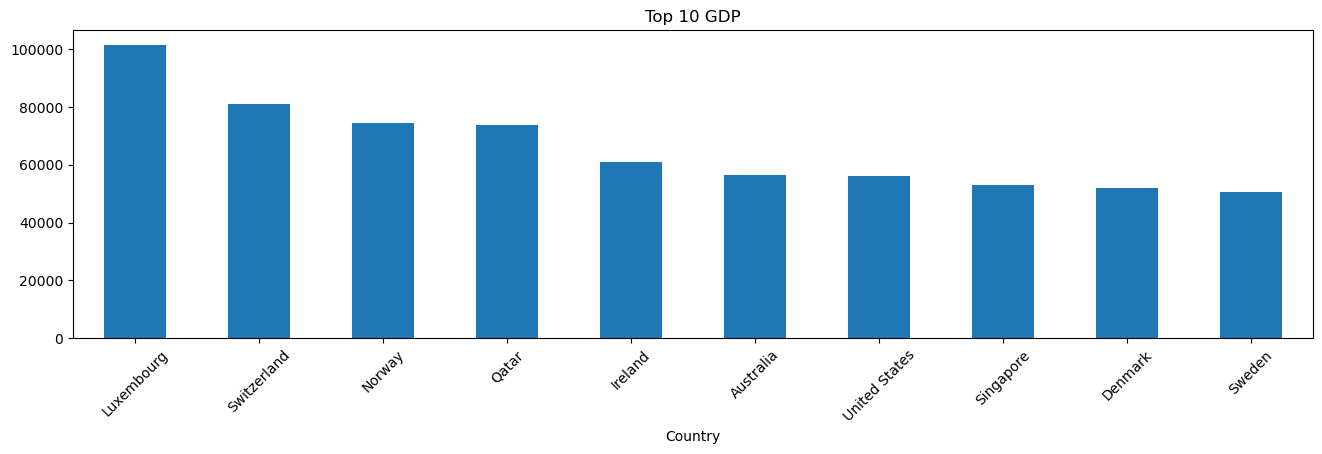

In [44]:
#Top10GDP Countries Calculated 
clean.groupby('Country')['GDP per Capita'].mean().sort_values(ascending=False)[:10].plot.bar(figsize=[16,4],rot=45,title='Top 10 GDP');

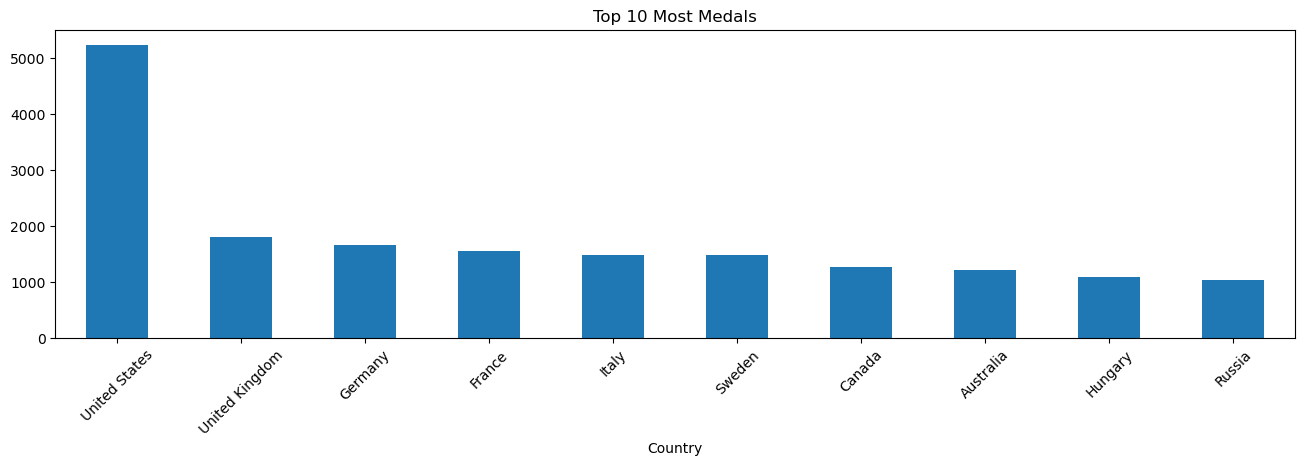

In [45]:
#Top10Medals Countries Calculated 
clean.groupby('Country').Medal.count().sort_values(ascending=False)[:10].plot.bar(figsize=[16,4],rot=45, title='Top 10 Most Medals');

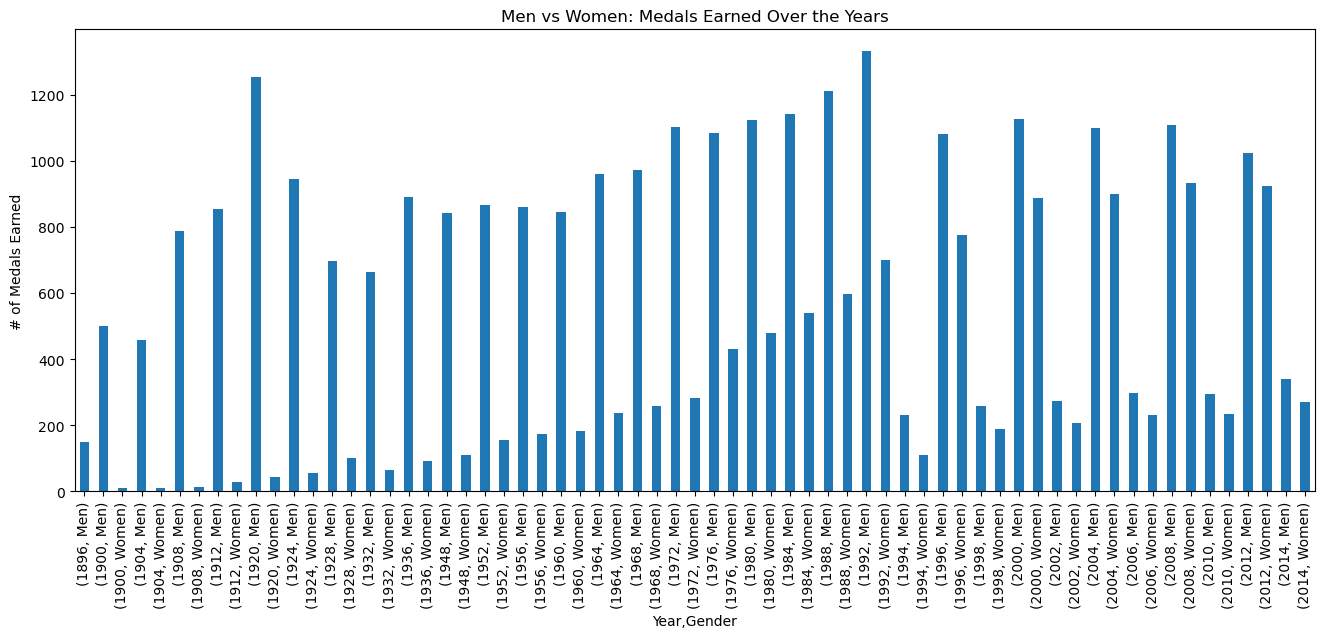

In [52]:
# Men vs Women Medal Wins Over 
olympics.groupby(['Year','Gender']).Medal.count().plot.bar(figsize=[16,6],title='Men vs Women: Medals Earned Over the Years', 
ylabel='# of Medals Earned');


In [47]:
# Women with Most Medals per Country
womenwins = olympics.loc[olympics["Gender"]== 'Women',:]

In [48]:
womenbycountry = womenwins.groupby('Code')["Code"].count()

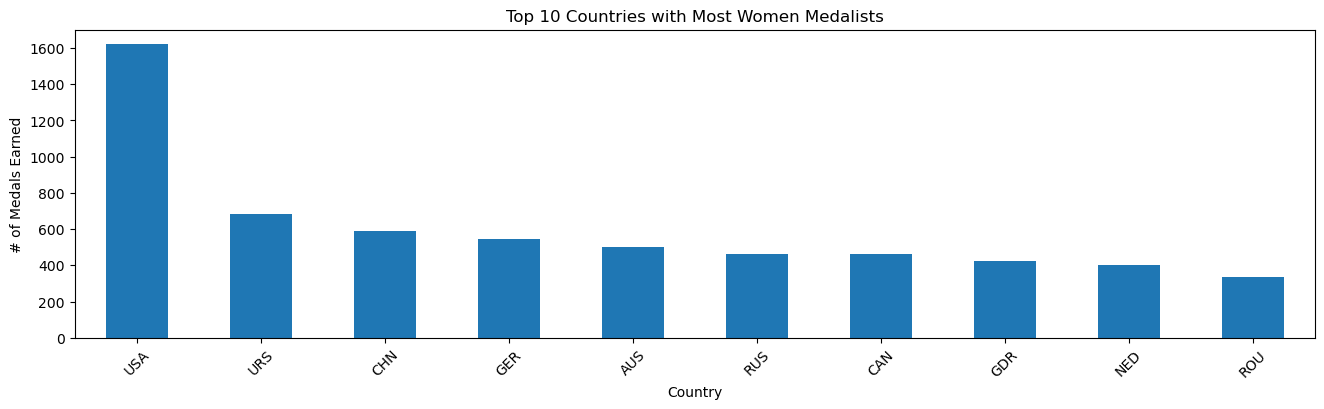

In [51]:
#Disply Women with Most Medals Per Country
womenbycountry.sort_values(ascending=False)[:10].plot.bar(figsize=[16,4],rot=45, title='Top 10 Countries with Most Women Medalists',
xlabel = 'Country',ylabel='# of Medals Earned');